# Basketball Teams and Leagues Project - Group ID: 7

Group Members:

Ali Arda Girgin (26993)

Efe Alpay (22417)

Eren Mutlu (25284)

Kamil Atakan Çelikyürek (26896)


## Introduction

In basketball leagues; most of the time, the teams have a star player during the seasonal games which can be considered as having more possession than other teammates. If the star player in a team has a better percentage of FGM/FGA than the star players among the other teams in their league is more likely to be successful/champion. The main purpose of this project is to examine the success of a team among the others in a basketball league.
 

### Problem Definition

We defined a term "Player Point" as ((FGM x 2) + (3PM x 3) / (FGA x 2) + (3PA x 3)) for star player of each team.

With this research our aim is to determine a star player for each team (we considered the star player as the player that have the most "Player Point" in a team) and corralate his "Player Point" among other star players in the whole season by making investigations in the data of FGA (i.e. Field Goals Attempt), FGM (i.e. Field Goals Made), 3PA (i.e. Three Points Attempt), 3PM (i.e. Three Points Made) and the data of champions and runner-ups of that season.

The order the of this research as follows:

Determine a star player for each team among seasons

Find the "Player Point" of each star player that we found

Find champions and runner-ups per season (championsdata and runnerupsdata)

Comparing the star players of the champions and the runner-ups per season.

Determine whether the star player of champion team is better than from the star player of runner-up team or not and compare stats of both players

### Utilized Datasets

We have several data sets. 

The first data set that are we going to use is "Basketball Teams and Leagues" which includes the stats of each player (e.g. FGM, FGA) for all leagues (e.g. NBA, Euroleague). We will only use the "NBA League".

First Data Link: ​https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues


The second and the third of the data that we are going to use is "NBA Champions and Runner-ups" which includes the champions and runner-ups for each season.

Second & Third Data Link: https://www.kaggle.com/daverosenman/nba-finals-team-stats

In [214]:
# Importing data from Google Drive
from google.colab import drive
drive.mount("./drive")
path_prefix = "./drive/My Drive/Colab Folder/cs210_term_project"

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [215]:
# Loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
%matplotlib inline

In [216]:
# Reading data that imported from Google Drive
filename_first_data = "players_stats_by_season_full_details.csv"
filename_second_data = "championsdata.csv"
filename_third_data = "runnerupsdata.csv"
first_dataframe = pd.read_csv(join(path_prefix, filename_first_data))
second_dataframe = pd.read_csv(join(path_prefix, filename_second_data))
third_dataframe = pd.read_csv(join(path_prefix, filename_third_data))

In [217]:
# Arranging first data
players_dataframe = first_dataframe[first_dataframe["League"] == "NBA"]
players_dataframe = players_dataframe[players_dataframe["Stage"] == "Regular_Season"]
players_dataframe = players_dataframe.drop(["League", "Stage"], axis = 1)
list_of_seasons = ["1999 - 2000", "2000 - 2001", "2001 - 2002", "2002 - 2003", "2003 - 2004", "2004 - 2005", "2005 - 2006", "2006 - 2007", "2007 - 2008", "2008 - 2009",
                   "2009 - 2010", "2010 - 2011", "2011 - 2012", "2012 - 2013", "2013 - 2014", "2014 - 2015", "2015 - 2016", "2016 - 2017", "2017 - 2018"]
players_dataframe = players_dataframe[players_dataframe["Season"].apply(lambda x : x in list_of_seasons)]
players_dataframe.head(4)

,Season,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,1999 - 2000,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,1,432,824,223,255,336,742,1078,299,36,239,2344,1972.0,Mar,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,1999 - 2000,Vince Carter,TOR,82,3126.0,788,1696,95,236,436,551,178,263,150,326,476,322,110,92,2107,1977.0,Jan,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,1999 - 2000,Karl Malone,UTA,82,2947.0,752,1476,2,8,589,739,231,229,169,610,779,304,79,71,2095,1963.0,Jul,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,1999 - 2000,Allen Iverson,PHI,70,2853.0,729,1733,89,261,442,620,230,162,71,196,267,328,144,5,1989,1975.0,Jun,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers


In [218]:
# Forming dictionary for converting teams to abbreviations of the second and third data
teams_abbreviations_dictionary = {"Lakers": "LAL", "Pacers": "IND", "Sixers": "PHI", "Nets": "NJN",
                                  "Spurs": "SAS", "Pistons": "DET", "Heat": "MIA", "Mavericks": "DAL",
                                  "Cavaliers": "CLE", "Celtics": "BOS", "Magic": "ORL", "Thunder": "OKC",
                                  "'Heat'": "MIA", "Warriors": "GSW"}

In [219]:
# Arranging second data and forming the champions data with respect to years
second_dataframe = second_dataframe[second_dataframe["Year"] >= 2000]
champions_year_team_dict = {}
for index, row in second_dataframe.iterrows():
  if row["Year"] not in champions_year_team_dict.keys():
    string = str(row["Year"] - 1) + " - " + str(row["Year"])
    champions_year_team_dict[string] = row["Team"]

In [220]:
# Arranging third data and forming the runner-ups data with respect to years
third_dataframe = third_dataframe[third_dataframe["Year"] >= 2000]
runnerups_year_team_dict = {}
for index, row in third_dataframe.iterrows():
  if row["Year"] not in runnerups_year_team_dict.keys():
    string = str(row["Year"] - 1) + " - " + str(row["Year"])
    runnerups_year_team_dict[string] = row["Team"]

In [221]:
# Storing the data of season list
list_of_years_traning_data = list(champions_year_team_dict.keys())
list_of_years_test_data = ["2014 - 2015", "2015 - 2016", "2016 - 2017", "2017 - 2018"]
list_of_years_traning_data.remove("2014 - 2015")
list_of_years_traning_data.remove("2015 - 2016")
list_of_years_traning_data.remove("2016 - 2017")
list_of_years_traning_data.remove("2017 - 2018")

In [222]:
# Combining second and third data and forming a dataframe
champions_runnerups_dataframe = pd.DataFrame(champions_year_team_dict.keys(), columns = ["Years"])
champions_runnerups_dataframe["Champions"] = champions_year_team_dict.values()
champions_runnerups_dataframe["Runnerups"] = runnerups_year_team_dict.values()
champions_runnerups_dataframe = champions_runnerups_dataframe.set_index("Years")
champions_runnerups_dataframe.head(4)

,Champions,Runnerups
Years,,
1999 - 2000,Lakers,Pacers
2000 - 2001,Lakers,Sixers
2001 - 2002,Lakers,Nets
2002 - 2003,Spurs,Nets


## Data Exploration

We preprocessed the raw data priorly, and we are going to process the data in such a manner that we can use.

In [223]:
# Discarding the players that have less points than the mean
players_dataframe = players_dataframe[players_dataframe["FGA"] >= players_dataframe["FGA"].mean()]

# Calculating point for each player
players_dataframe["Player Point"] = ((players_dataframe["FGM"] * 2) + (players_dataframe["3PM"] * 3)) / ((players_dataframe["FGA"] * 2) + (players_dataframe["3PA"] * 3))

In [224]:
# Forming an empty dictionary to store truthness of the hypothesis for each season
hypothesis_truthness_counts = [0, 0]

# Finding the actual results of the training data
list_of_actual_outcome_training_data = []

# Iterating over the years to perform hypothesis on each season
for season in list_of_years_traning_data:
  current_season_champion = champions_runnerups_dataframe.loc[season, "Champions"]
  current_season_runnerup = champions_runnerups_dataframe.loc[season, "Runnerups"]
  players_of_champion = players_dataframe[(players_dataframe["Season"] == season) & (players_dataframe["Team"] == teams_abbreviations_dictionary[current_season_champion])]
  players_of_champion = players_of_champion[["Player", "Player Point"]].sort_values(by = "Player Point", ascending = False)
  players_of_champion = players_of_champion.reset_index(drop = True)
  players_of_runnerup = players_dataframe[(players_dataframe["Season"] == season) & (players_dataframe["Team"] == teams_abbreviations_dictionary[current_season_runnerup])]
  players_of_runnerup = players_of_runnerup[["Player", "Player Point"]].sort_values(by = "Player Point", ascending = False)
  players_of_runnerup = players_of_runnerup.reset_index(drop = True)
  if players_of_champion.iloc[0, 1] > players_of_runnerup.iloc[0, 1]:
    list_of_actual_outcome_training_data.append(1)
    hypothesis_truthness_counts[0] += 1
  else:
    list_of_actual_outcome_training_data.append(0)
    hypothesis_truthness_counts[1] += 1

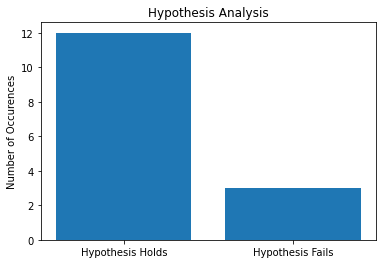

In [226]:
# Visualizing the results
plt.bar(["Hypothesis Holds", "Hypothesis Fails"], hypothesis_truthness_counts)
plt.title("Hypothesis Analysis")
plt.ylabel("Number of Occurences")
plt.show()

## Machine Learning Models

In this part, we tried Decision Tree Algorithm for our data. We have 19 seasons in "NBA", thus we separated them into 15 seasons for the trainig part of the Machine Learning and then use it to predict next 4 seasons. After we implemented those, we got 75% accuracy.

### Implementation

In [227]:
# Loading Machine Learning modules
from sklearn import tree

In [228]:
# Creating empty dataframe for the training data
champion_mvp_df = pd.DataFrame(columns = ["Season", "Player Name", "Player Point", "Age"])
list_of_champion_mvp_seasons = []
list_of_champion_mvp_names = []
list_of_champion_mvp_playerPoint = []
list_of_champion_mvp_birthYear = []
for season in list_of_years_traning_data:
  current_season_champion = champions_runnerups_dataframe.loc[season, "Champions"]
  players_of_champion = players_dataframe[(players_dataframe["Season"] == season) & (players_dataframe["Team"] == teams_abbreviations_dictionary[current_season_champion])]
  players_of_champion = players_of_champion[["Season", "Player", "Player Point", "birth_year"]].sort_values(by = "Player Point", ascending = False)
  players_of_champion = players_of_champion.reset_index(drop = True)
  list_of_champion_mvp_seasons.append(players_of_champion.iloc[0, 0])
  list_of_champion_mvp_names.append(players_of_champion.iloc[0, 1])
  list_of_champion_mvp_playerPoint.append(players_of_champion.iloc[0, 2])
  list_of_champion_mvp_birthYear.append(int(int(season[0:4]) - players_of_champion.iloc[0, 3]))
champion_mvp_df["Season"] = list_of_champion_mvp_seasons
champion_mvp_df["Player Name"] = list_of_champion_mvp_names
champion_mvp_df["Player Point"] = list_of_champion_mvp_playerPoint
champion_mvp_df["Age"] = list_of_champion_mvp_birthYear
champion_mvp_df = champion_mvp_df.set_index("Season")

In [229]:
# Creating empty dataframe for the test datas
champion_mvp_df_predict = pd.DataFrame(columns = ["Season", "Player Name", "Player Point", "Age"])
list_of_champion_mvp_seasons_predict = []
list_of_champion_mvp_names_predict = []
list_of_champion_mvp_playerPoint_predict = []
list_of_champion_mvp_birthYear_predict = []
for season in list_of_years_test_data:
  current_season_champion_predict = champions_runnerups_dataframe.loc[season, "Champions"]
  players_of_champion_predict = players_dataframe[(players_dataframe["Season"] == season) & (players_dataframe["Team"] == teams_abbreviations_dictionary[current_season_champion_predict])]
  players_of_champion_predict = players_of_champion_predict[["Season", "Player", "Player Point", "birth_year"]].sort_values(by = "Player Point", ascending = False)
  players_of_champion_predict = players_of_champion_predict.reset_index(drop = True)
  list_of_champion_mvp_seasons_predict.append(players_of_champion_predict.iloc[0, 0])
  list_of_champion_mvp_names_predict.append(players_of_champion_predict.iloc[0, 1])
  list_of_champion_mvp_playerPoint_predict.append(players_of_champion_predict.iloc[0, 2])
  list_of_champion_mvp_birthYear_predict.append(int(int(season[0:4]) - players_of_champion_predict.iloc[0, 3]))
champion_mvp_df_predict["Season"] = list_of_champion_mvp_seasons_predict
champion_mvp_df_predict["Player Name"] = list_of_champion_mvp_names_predict
champion_mvp_df_predict["Player Point"] = list_of_champion_mvp_playerPoint_predict
champion_mvp_df_predict["Age"] = list_of_champion_mvp_birthYear_predict
champion_mvp_df_predict = champion_mvp_df_predict.set_index("Season")

In [230]:
# Converting training dataframe to the list that we can implement into the "fit" method
features = []
for label, row in champion_mvp_df.iterrows():
  features.append([row["Player Point"], row["Age"]])

# Converting test dataframe to the list that we can implement into the "predict" method
predicts = []
for label, row in champion_mvp_df_predict.iterrows():
  predicts.append([row["Player Point"], row["Age"]])

In [231]:
# Training part of the Decision Tree Algorithm
ml_algorithm = tree.DecisionTreeClassifier()
ml_algorithm = ml_algorithm.fit(features, list_of_actual_outcome_training_data)

In [232]:
# Implementation for the visualization part of the teams after the predicting of machine learning
champion_runnerup_list = []
for label, row in champions_runnerups_dataframe.iterrows():
  if label in list_of_years_test_data:
    champion_runnerup_list.append([row["Champions"], row["Runnerups"]])

In [233]:
# Finding the actual results of the test data
list_of_actual_outcome_test_data = []
for season in list_of_years_test_data:
  current_season_champion = champions_runnerups_dataframe.loc[season, "Champions"]
  current_season_runnerup = champions_runnerups_dataframe.loc[season, "Runnerups"]
  players_of_champion = players_dataframe[(players_dataframe["Season"] == season) & (players_dataframe["Team"] == teams_abbreviations_dictionary[current_season_champion])]
  players_of_champion = players_of_champion[["Player", "Player Point"]].sort_values(by = "Player Point", ascending = False)
  players_of_champion = players_of_champion.reset_index(drop = True)
  players_of_runnerup = players_dataframe[(players_dataframe["Season"] == season) & (players_dataframe["Team"] == teams_abbreviations_dictionary[current_season_runnerup])]
  players_of_runnerup = players_of_runnerup[["Player", "Player Point"]].sort_values(by = "Player Point", ascending = False)
  players_of_runnerup = players_of_runnerup.reset_index(drop = True)
  if players_of_champion.iloc[0, 1] > players_of_runnerup.iloc[0, 1]:
    list_of_actual_outcome_test_data.append(1)
  else:
    list_of_actual_outcome_test_data.append(0)

In [234]:
# Visualization of the outcomes
all_possibilites = len(predicts)
count_of_true_predict = 0
for each_predict_index in range(len(predicts)):
  print("Season:", list_of_years_test_data[each_predict_index])
  if (ml_algorithm.predict([predicts[each_predict_index]])[0] == list_of_actual_outcome_test_data[each_predict_index]):
    print("Expected Outcome: ", champion_runnerup_list[each_predict_index][0], sep = "")
    count_of_true_predict += 1
  else:
    print("Expected Outcome: ", champion_runnerup_list[each_predict_index][1], sep = "")
  print("Actual Outcome:   ", champion_runnerup_list[each_predict_index][0], "\n", sep = "")

Season: 2014 - 2015
Expected Outcome: Cavaliers
Actual Outcome:   Warriors

Season: 2015 - 2016
Expected Outcome: Cavaliers
Actual Outcome:   Cavaliers

Season: 2016 - 2017
Expected Outcome: Warriors
Actual Outcome:   Warriors

Season: 2017 - 2018
Expected Outcome: Warriors
Actual Outcome:   Warriors



In [236]:
# Accuracy of our Decision Tree Algorithm
accuracy_of_ml = (count_of_true_predict / all_possibilites) * 100
print("Accuracy of the Decision Tree Algorithm: ", accuracy_of_ml, "%", sep = "")

Accuracy of the Decision Tree Algorithm: 75.0%


## Future Work

Firstly, we are going to extend our data because we need data as we need to increase the accuracy of our Machine Learning model. Then, we are going to complete Machine Learning methods we tried and give a brief conclusion about the project. Also, we will revise all the parts throughout the project. 

## Work Division

Ali Arda Girgin: Implementing the Introduction part, determining problem and utilizing the data for Data Exploration

Efe Alpay: Determining problem and utilizing the data for Data Exploration

Eren Mutlu: Searching about Machine Learning Algorithms and trying them

Kamil Atakan Çelikyürek: Coding part of the Data Exploration